# 3-2

## 함수형 API

In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.optimizers import RMSprop

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
(train_images, train_labels), (test_images, test_labels) = \
    mnist.load_data()

In [4]:
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
input_tensor = Input(shape=(28*28,))
x = Dense(32, activation='relu')(input_tensor)
output_tensor = Dense(10, activation='softmax')(x)

In [7]:
model = Model(inputs=input_tensor, outputs=output_tensor)

In [8]:
model.compile(optimizer=RMSprop(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.4655 - acc: 0.8768
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2369 - acc: 0.9337
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1956 - acc: 0.9438
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1699 - acc: 0.9513
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1512 - acc: 0.9555
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1378 - acc: 0.9598
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1266 - acc: 0.9629: 0s - loss: 0.1295 
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1178 - acc: 0.9661
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1100 - acc: 0.9682
Epoch 10/10
60000/60000 [==============================] - 1s 17us/step - loss: 

## 3-4

In [10]:
from keras.datasets import imdb

In [11]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [12]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [16]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[:10000]
y_val = y_train[:10000]
partial_y_train = y_train[:10000]

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 3s 294us/step - loss: 0.5563 - acc: 0.7546 - val_loss: 0.3802 - val_acc: 0.9044
Epoch 2/20
10000/10000 [==============================] - 1s 136us/step - loss: 0.3453 - acc: 0.8970 - val_loss: 0.2671 - val_acc: 0.9328
Epoch 3/20
10000/10000 [==============================] - 1s 130us/step - loss: 0.2526 - acc: 0.9263 - val_loss: 0.1932 - val_acc: 0.9549
Epoch 4/20
10000/10000 [==============================] - 1s 140us/step - loss: 0.1880 - acc: 0.9484 - val_loss: 0.1842 - val_acc: 0.9374
Epoch 5/20
10000/10000 [==============================] - 2s 153us/step - loss: 0.1549 - acc: 0.9560 - val_loss: 0.1255 - val_acc: 0.9672
Epoch 6/20
10000/10000 [==============================] - 2s 178us/step - loss: 0.1158 - acc: 0.9723 - val_loss: 0.0886 - val_acc: 0.9841
Epoch 7/20
10000/10000 [==============================] - 2s 210us/step - loss: 0.0943 - acc: 0.9785 - val_loss: 0.0696 - 

In [21]:
import matplotlib.pyplot as plt

In [22]:
history_dict = history.history

In [23]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

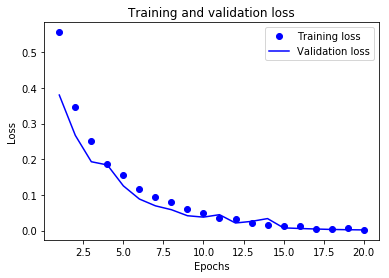

In [24]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
plt.clf()

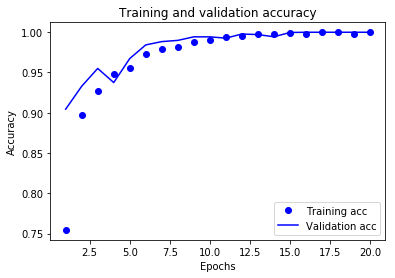

In [26]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.3051 - acc: 0.9194
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1826 - acc: 0.9379
Epoch 3/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.1435 - acc: 0.9506
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1169 - acc: 0.9600


In [29]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 160us/step


[0.4030776961040497, 0.86564]

In [30]:
model.predict(x_test)

array([[0.13509497],
       [0.999998  ],
       [0.99973613],
       ...,
       [0.30212855],
       [0.03356867],
       [0.3868746 ]], dtype=float32)

## 3-5

In [35]:
from keras.datasets import reuters
from collections import Counter

In [32]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [33]:
len(train_data)

8982

In [34]:
len(test_data)

2246

In [37]:
print(Counter(train_labels))

Counter({3: 3159, 4: 1949, 19: 549, 16: 444, 1: 432, 11: 390, 20: 269, 13: 172, 8: 139, 10: 124, 9: 101, 21: 100, 25: 92, 2: 74, 18: 66, 24: 62, 0: 55, 34: 50, 12: 49, 36: 49, 28: 48, 6: 48, 30: 45, 23: 41, 31: 39, 17: 39, 40: 36, 32: 32, 41: 30, 14: 26, 26: 24, 39: 24, 43: 21, 15: 20, 38: 19, 37: 19, 29: 19, 45: 18, 5: 17, 7: 16, 27: 15, 22: 15, 42: 13, 44: 12, 33: 11, 35: 10})


In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [40]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

or

In [41]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [44]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [48]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 236us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.0992 - acc: 0.7642 - val_loss: 1.1747 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.8728 - acc: 0.8156 - val_loss: 1.0838 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.7060 - acc: 0.8492 - val_loss: 0.9867 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5695 - acc: 0.8791 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.4625 - acc: 0.9034 - val_loss: 0.9089 - val_acc: 0.8020


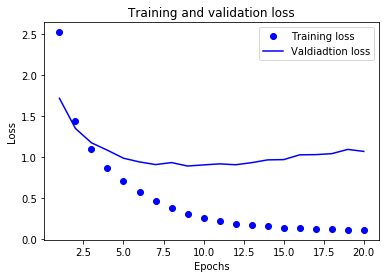

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdiadtion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

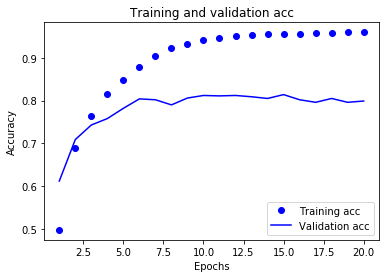

In [50]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 140us/step - loss: 0.2082 - acc: 0.9428
Epoch 2/9
8982/8982 [==============================] - 1s 128us/step - loss: 0.1683 - acc: 0.9471
Epoch 3/9
8982/8982 [==============================] - 1s 129us/step - loss: 0.1474 - acc: 0.9499
Epoch 4/9
8982/8982 [==============================] - 1s 131us/step - loss: 0.1350 - acc: 0.9526
Epoch 5/9
8982/8982 [==============================] - 1s 131us/step - loss: 0.1272 - acc: 0.9528
Epoch 6/9
8982/8982 [==============================] - 1s 144us/step - loss: 0.1227 - acc: 0.9541
Epoch 7/9
8982/8982 [==============================] - 1s 129us/step - loss: 0.1148 - acc: 0.9548
Epoch 8/9
8982/8982 [==============================] - 1s 139us/step - loss: 0.1137 - acc: 0.9557
Epoch 9/9
8982/8982 [==============================] - 1s 131us/step - loss: 0.1130 - acc: 0.9558


In [52]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 174us/step


[1.318385804856556, 0.7769367765180787]

In [53]:
predictions = model.predict(x_test)

In [55]:
np.argmax(predictions[0])

4

## 3-6 

In [64]:
from keras.datasets import boston_housing

In [65]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [66]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [67]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [68]:
def build_model():
    model = Sequential()
    model.add(Dense(64, 
                    activation='relu', 
                    input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [69]:
from sklearn.model_selection import KFold

In [71]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 : #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data, 
              partial_train_targets, 
              epochs=num_epochs, 
              batch_size=1, 
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 : # 0
처리중인 폴드 : # 1
처리중인 폴드 : # 2
처리중인 폴드 : # 3


In [72]:
all_scores

[1.946837883184452, 2.8531633273209676, 2.6248958582925326, 2.2498000694973634]

In [88]:
np.mean(all_scores)

2.4186742845738287

In [75]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 : #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=1, 
                        validation_data=(val_data, val_targets),
                        verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 : # 0
처리중인 폴드 : # 1
처리중인 폴드 : # 2
처리중인 폴드 : # 3


In [76]:
average_mae_history = [
   np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

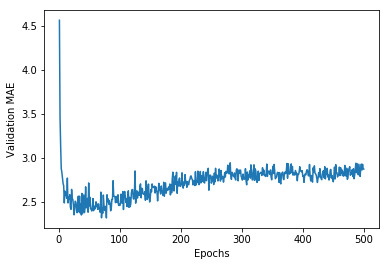

In [78]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [83]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

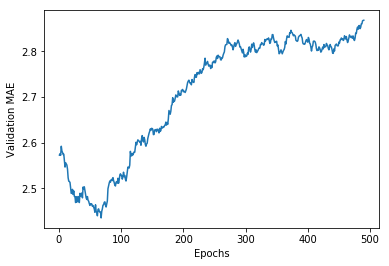

In [84]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [85]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [86]:
test_mse_score

15.18049711339614

In [87]:
test_mae_score

2.554423023672665